# Videos and Exercises for Session 3: Data Structuring in Pandas II

In this combined teaching module and exercise set, you will continue working with structuring data. 

In the last session, you were working with making operations on relatively clean data. However, before it is meaningful to make such operations, you will (as a data scientist) often have to do some very preliminary cleaning, involving for instance dealing with missings and duplicates as well as combining and restructuring larger sets of data. These are among the topics that we will be focusing on today.

The notebook is structured as follows:
1. Missings and Duplicated Data:
    - Handling Missings: Delete or Interpolate?
    - Spotting and Interpreting Duplicates
2. Combining Data Sets:
    - Intro to `merge`, `concat` and `join`
    - Horizontal and Vertical Merging
3. Split-Apply-Combine
    - Finding Means and Other Characteristics from Data Subsets (aggregation)
4. Reshaping Data
    - Wide and Long Data
    - Intro to `stack`

## Loading
Before we get started.... load in the required modules and set up the plotting library!

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import YouTubeVideo

#  Part 1: Duplicates and Missings

In this section we will use [this dataset](https://archive.ics.uci.edu/ml/datasets/Adult) from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets.html) to practice some basic operations on pandas dataframes. This is an extract from the US Census containing almost 50,000 rows of individual-level micro data from 1994.


> **Ex. 3.1.1:** This link `'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'` leads to a comma-separated file with income data from a US census. Load the data into a pandas dataframe and show the 25th to 35th row.
>
> _Hint 1:_ There are no column names in the dataset. Use the list `['age','workclass', 'fnlwgt', 'educ', 'educ_num', 'marital_status', 'occupation','relationship', 'race', 'sex','capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'wage']` as names. 
>
> _Hint 2:_ When you read in the csv, you might find that pandas includes whitespace in all of the cells. To get around this include the argument `skipinitialspace = True` to `read_csv()`. 

In [9]:
url= f'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'

my_df = pd.read_csv(url,
    header=None, # use no header information from the csv
    skipinitialspace = True, # When you read in the csv, you might find that pandas includes whitespace in all of the cells. To get around this include the argument `skipinitialspace = True` to `read_csv()`. 
    names=['age','workclass', 'fnlwgt', 'educ', 'educ_num', 'marital_status', 'occupation','relationship', 'race', 'sex','capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'wage']
    )

my_df 


,age,workclass,fnlwgt,educ,educ_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


##  Missing data

Often our data having information missing, e.g. one row lacks data on education for a specific person. Watch the video below about missing data type and get some simple tools to deal with the problem.

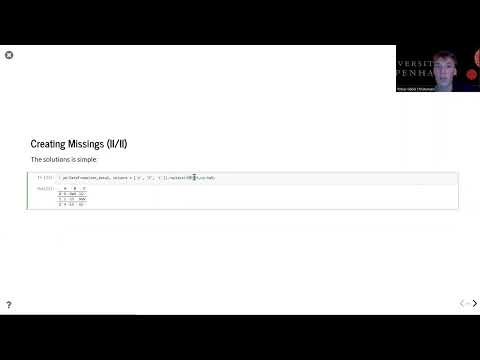

In [3]:
YouTubeVideo('mX6uMt_1-Lk', width=640, height=360)

> **Ex. 3.1.2:** What is the missing value sign in this dataset? Replace all missing values with NA's understood by pandas. Then proceed to drop all rows containing any missing values with the `dropna` method. Store this new dataframe as `df_census_new`. How many rows are removed in this operation?
> 
> _Hint:_ NaN from NumPy might be useful. What you should discover here is that pandas indeed has native methods for dealing with missings.

In [46]:
#Overblik:
print(my_df.head())

#Printer alle unikke værdier af 'area'.
for column in my_df.columns:
    print("\nColumn Name:", column)
    print(my_df[column].unique())

# Vi ser at missings er tastet ind således: '?'

#Vi skifter nu værdien af missing værdien til noget, der er panda-venligt: 
my_df = my_df.replace('?', np.nan)

#Vi laver et nyt datasæt, hvor disse værdier bliver droppet: 
df_census_new = my_df.dropna()

# Find ud af, hvilke rækker, der er fjernet:

rows_removed = my_df.shape[0] - df_census_new.shape[0]
print(f"Number of rows removed: {rows_removed}")

#df_census_new


   age         workclass  fnlwgt       educ  educ_num      marital_status  \
0   39         State-gov   77516  Bachelors        13       Never-married   
1   50  Self-emp-not-inc   83311  Bachelors        13  Married-civ-spouse   
2   38           Private  215646    HS-grad         9            Divorced   
3   53           Private  234721       11th         7  Married-civ-spouse   
4   28           Private  338409  Bachelors        13  Married-civ-spouse   

          occupation   relationship   race     sex  capital_gain  \
0       Adm-clerical  Not-in-family  White    Male          2174   
1    Exec-managerial        Husband  White    Male             0   
2  Handlers-cleaners  Not-in-family  White    Male             0   
3  Handlers-cleaners        Husband  Black    Male             0   
4     Prof-specialty           Wife  Black  Female             0   

   capital_loss  hours_per_week native_country   wage  
0             0              40  United-States  <=50K  
1             0 

##  Duplicated Data

Watch the video below about duplicated data and how to handle such observations.

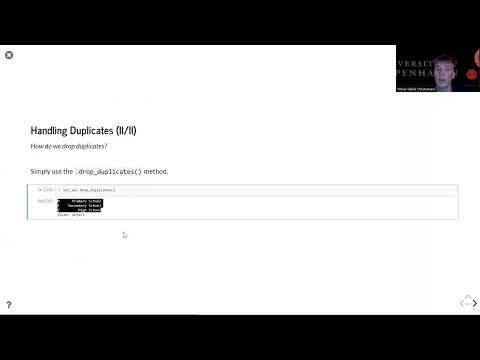

In [4]:
YouTubeVideo('aQrqhJnHIqQ', width=640, height=360)

> **Ex. 3.1.3:** Determine whether or not duplicated rows is a problem in the NOAA weather data and the US census data. You should come up with arguments from the structure of the rows.
>
> *Hint:* Just use the `load_weather()` function from the last module (provided below) to load weather data from 1863 only.

In [26]:
def load_weather(year):
    
    url = f"ftp://ftp.ncdc.noaa.gov/pub/data/ghcn/daily/by_year/{year}.csv.gz"

    df_weather = pd.read_csv(url, 
                             header=None)        

    df_weather = df_weather.iloc[:,:4] 
    
    column_names = ['station', 'datetime', 'obs_type', 'obs_value']
    df_weather.columns = column_names 
    
    df_weather['obs_value'] = df_weather['obs_value'] / 10 
    
    selection_tmax = df_weather.obs_type == 'TMAX'
    df_select = df_weather.loc[selection_tmax]
    
    df_sorted = df_select.sort_values(by=['station', 'datetime'])
    df_reset = df_sorted.reset_index(drop=True)
    df_out = df_reset.copy()
            
    return df_out

In [31]:
# Så vi kører først funktionen og vælger vejret for 1863.
df_weather = load_weather(1863)

df_weather 

#Nu tjekker vi, om hver række er en duplikat af en tidligere række eller ej. Hvis der er en række, der er en duplikat af en tidligere række, vil den returnere værdien "True".
duplicates = df_weather.duplicated()

duplicates

# Nu tæller vi antal af False og True værdier. 
num_duplicates = duplicates.sum()

num_duplicates


In [32]:
num_duplicates 

0

# Part 2: Combining Data Sets

Below we hear about how different datasets can be combined into one, by merging on overlapping information that exists in both datasets.

**Note:** In the video, we are only dealing with one-to-one joins. This is a type of merge where there is only one row with a given merge key in each data frame. However, you may encounter situations where there are multiple rows that share the value of a merge key. In this situation, you may perform a one-to-many join or a many-to-many join that forms a Cartesian product of your rows.

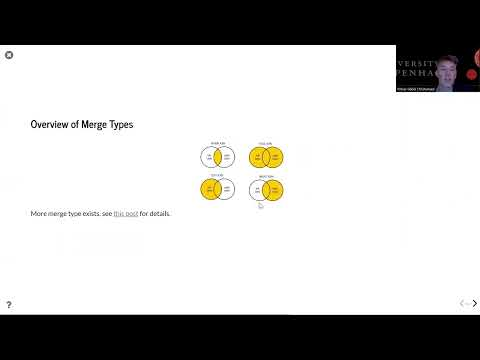

In [5]:
YouTubeVideo('y2YL_cMp8v0', width=640, height=360)

We now continue with structuring weather data. Use the function `load_weather()` for fetching and structuring weather data that you also used above.

> **Ex. 3.2.1:** Get the processed data from years 1870-1875 as a list of DataFrames. Generate a variable that denotes the year that the observations belong to. Convert the list into a single DataFrame by concatenating vertically. 

In [33]:
# Load data fra flere år:

def load_weather(year):
    
    url = f"ftp://ftp.ncdc.noaa.gov/pub/data/ghcn/daily/by_year/{year}.csv.gz"
    df_weather = pd.read_csv(url, 
                             header=None)        
    df_weather = df_weather.iloc[:,:4] 
    
    column_names = ['station', 'datetime', 'obs_type', 'obs_value']
    df_weather.columns = column_names 
    
    df_weather['obs_value'] = df_weather['obs_value'] / 10 
    
    selection_tmax = df_weather.obs_type == 'TMAX'
    df_select = df_weather.loc[selection_tmax]
    
    df_sorted = df_select.sort_values(by=['station', 'datetime'])
    df_reset = df_sorted.reset_index(drop=True)
    df_out = df_reset.copy()
            
    return df_out


df_weather_period = [load_weather(year) for year in range(1860, 1865)]



In [123]:
# Nu har vi en liste af dataframes:
df_weather_period 

# Concatenate alle dataframes i listen:
df_combined = pd.concat(df_weather_period)

# Laver nu variablen "year":
df_combined['year'] = df_combined['datetime'].astype(str).str[:4]
df_combined 


,station,datetime,obs_type,obs_value,area,datetime_dt,month,year
0,ASN00063004,18700809,TMAX,10.0,AS,1870-08-09,8,1870
1,ASN00063004,18700810,TMAX,8.9,AS,1870-08-10,8,1870
2,ASN00063004,18700811,TMAX,15.6,AS,1870-08-11,8,1870
3,ASN00063004,18700812,TMAX,16.7,AS,1870-08-12,8,1870
4,ASN00063004,18700813,TMAX,16.7,AS,1870-08-13,8,1870
...,...,...,...,...,...,...,...,...
30699,USW00094728,18741227,TMAX,8.3,US,1874-12-27,12,1874
30700,USW00094728,18741228,TMAX,10.0,US,1874-12-28,12,1874
30701,USW00094728,18741229,TMAX,9.4,US,1874-12-29,12,1874
30702,USW00094728,18741230,TMAX,-2.8,US,1874-12-30,12,1874


# Part 3: Split-Apply-Combine

Often we need to process information for a given individual, point in time etc. Instead of writing a loop over all the subsets of the data, we can use a more clever approach. Below we introduce the split-apply-combine framework and show how we can leverage it in pandas

In [ ]:
YouTubeVideo('pZinSHCRgbA', width=640, height=360)

*Note:* The Split-Apply-Combine method uses `.groupby()`. As indicated in the video, `.groupby()` is a method of pandas dataframes, meaning we can call it like so: `data.groupby('colname')`. The method groups your dataset by a specified column, and applies any following changes within each of these groups. For a more detailed explanation see [this link](https://www.tutorialspoint.com/python_pandas/python_pandas_groupby.htm). The [documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html) might also be useful.

> **Ex. 3.3.1:** Compute the mean and median maximum daily temperature for each month-year-station pair on the dataframe `df_weather_period` from last exercise by using the _split-apply-combine_ procedure. Store the results in new columns `tmax_mean` and `tmax_median`. 

In [125]:
import pandas as pd


def load_weather(year):
    
    url = f"ftp://ftp.ncdc.noaa.gov/pub/data/ghcn/daily/by_year/{year}.csv.gz"
    df_weather = pd.read_csv(url, 
                             header=None)        
    df_weather = df_weather.iloc[:,:4] 
    
    column_names = ['station', 'datetime', 'obs_type', 'obs_value']
    df_weather.columns = column_names 
    
    df_weather['obs_value'] = df_weather['obs_value'] / 10 
    
    selection_tmax = df_weather.obs_type == 'TMAX'
    df_select = df_weather.loc[selection_tmax]
    
    df_sorted = df_select.sort_values(by=['station', 'datetime'])
    df_reset = df_sorted.reset_index(drop=True)
    df_out = df_reset.copy()

    # area process
    df_out['area'] = df_out['station'].str[0:2]
    
    # datetime process
    df_out['datetime_dt'] = pd.to_datetime(df_out['datetime'], format = '%Y%m%d')
    df_out['month'] = df_out['datetime_dt'].dt.month
    df_out['year'] = df_out['datetime_dt'].dt.year
            

    return df_out


df_weather_period = [load_weather(year) for year in range(1870, 1876)]


df_weather_period


[           station  datetime obs_type  obs_value area datetime_dt  month  year
 0      ASN00063004  18700809     TMAX       10.0   AS  1870-08-09      8  1870
 1      ASN00063004  18700810     TMAX        8.9   AS  1870-08-10      8  1870
 2      ASN00063004  18700811     TMAX       15.6   AS  1870-08-11      8  1870
 3      ASN00063004  18700812     TMAX       16.7   AS  1870-08-12      8  1870
 4      ASN00063004  18700813     TMAX       16.7   AS  1870-08-13      8  1870
 ...            ...       ...      ...        ...  ...         ...    ...   ...
 12362  USW00094728  18701227     TMAX       -1.1   US  1870-12-27     12  1870
 12363  USW00094728  18701228     TMAX        0.0   US  1870-12-28     12  1870
 12364  USW00094728  18701229     TMAX       -5.0   US  1870-12-29     12  1870
 12365  USW00094728  18701230     TMAX       -1.1   US  1870-12-30     12  1870
 12366  USW00094728  18701231     TMAX        5.6   US  1870-12-31     12  1870
 
 [12367 rows x 8 columns],
           

In [126]:
# Concatenate alle dataframes i listen:
df_combined2 = pd.concat(df_weather_period)
#df_combined2

# Group together: 
df_combined_grouped = df_combined2.groupby(['year', 'month', 'station'])

df_combined2['tmax_mean'] = df_combined_grouped['obs_value'].transform('mean') # beregn gennemsnittet
df_combined2['tmax_median'] = df_combined_grouped['obs_value'].transform('median') # beregn medianen

df_combined2

df_combined2.to_csv('my_dataframe.csv', index=False)



In [127]:
#Printer antallet af unikke værdier af 'tmax_mean':
print(df_combined2['tmax_mean'].nunique())
print(df_combined2['tmax_median'].nunique())

Antal_stationer = print(df_combined2['station'].nunique())
Antal_m=print(df_combined2['month'].nunique())
Antal_y=print(df_combined2['year'].nunique())

110*12*5


4408
660
124
12
6


6600

> **Ex. 3.3.2:** Plot the monthly max, min, mean, first and third quartiles for maximum temperature for our station with the ID _'CA006110549'_ for the years 1870-1875. 

> *Hint*: the method `describe` computes all these measures.

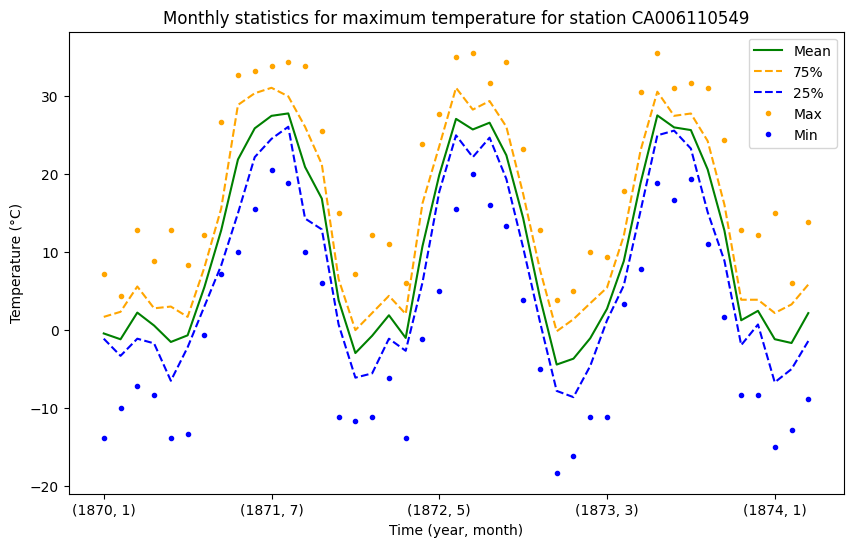

In [128]:
df_combined2[df_combined2['station'] == 'CA006110549']['obs_value'].describe()

# Select data for the specified station
df_station = df_combined2[df_combined2['station'] == 'CA006110549']

# Group data by year and month, and calculate statistics
df_station_grouped = df_station.groupby(['year', 'month'])['obs_value'].describe()

# Plot results
fig, ax = plt.subplots(figsize=(10,6))

# Mean
df_station_grouped['mean'].plot(ax=ax, color='green', label='Mean')

# 25% and 75% quantiles
df_station_grouped['75%'].plot(ax=ax, linestyle='dashed', color='orange', label='75%')
df_station_grouped['25%'].plot(ax=ax, linestyle='dashed', color='blue', label='25%')

# Min and Max
df_station_grouped['max'].plot(ax=ax, style='.', color='orange', label='Max')
df_station_grouped['min'].plot(ax=ax, style='.', color='blue', label='Min')

# Median (commented out)
#df_station_grouped['50%'].plot(ax=ax, label='Median')

plt.title('Monthly statistics for maximum temperature for station CA006110549')
plt.xlabel('Time (year, month)')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()


> **Ex. 3.3.3:** Parse the station location data which you can find at https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/ghcnd-stations.txt. Merge station locations onto the weather data spanning 1870-1875.  

> _Hint:_ The location data have the folllowing format, 

```
------------------------------
Variable   Columns   Type
------------------------------
ID            1-11   Character
LATITUDE     13-20   Real
LONGITUDE    22-30   Real
ELEVATION    32-37   Real
STATE        39-40   Character
NAME         42-71   Character
GSN FLAG     73-75   Character
HCN/CRN FLAG 77-79   Character
WMO ID       81-85   Character
------------------------------
```

> *Hint*: The station information has *fixed width format* - does there exist a pandas reader for that? Here Google might be helpful!

In [129]:
url = "https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/ghcnd-stations.txt"

# Define the column names
col_names = ['station', 'LATITUDE', 'LONGITUDE', 'ELEVATION', 'STATE', 'NAME', 
             'GSN FLAG', 'HCN/CRN FLAG', 'WMO ID']

# Definér kolonne bredden som vist i opgaven (Du kan beregne bredderne som forskellen mellem det enkelte interval. 
# For eksempel er bredden på ID kolonnen 11-1+1 = 11. 
# Intervallet for kolonnerne starter ikke fra 0, men fra 1, så vi skal tilføje 1.)
col_widths = [11, 9, 10, 7, 3, 31, 4, 4, 6]

# Read the fixed-width file
df_stations = pd.read_fwf(url, widths=col_widths, names=col_names, header=None)

# print(df_combined2.columns)
# print(df_stations.columns)
df_stations 


,station,LATITUDE,LONGITUDE,ELEVATION,STATE,NAME,GSN FLAG,HCN/CRN FLAG,WMO ID
0,ACW00011604,17.1167,-61.7833,10.1,NaN,ST JOHNS COOLIDGE FLD,NaN,NaN,NaN
1,ACW00011647,17.1333,-61.7833,19.2,NaN,ST JOHNS,NaN,NaN,NaN
2,AE000041196,25.3330,55.5170,34.0,NaN,SHARJAH INTER. AIRP,GSN,NaN,41196.0
3,AEM00041194,25.2550,55.3640,10.4,NaN,DUBAI INTL,NaN,NaN,41194.0
4,AEM00041217,24.4330,54.6510,26.8,NaN,ABU DHABI INTL,NaN,NaN,41217.0
...,...,...,...,...,...,...,...,...,...
124949,ZI000067969,-21.0500,29.3670,861.0,NaN,WEST NICHOLSON,NaN,NaN,67969.0
124950,ZI000067975,-20.0670,30.8670,1095.0,NaN,MASVINGO,NaN,NaN,67975.0
124951,ZI000067977,-21.0170,31.5830,430.0,NaN,BUFFALO RANGE,NaN,NaN,67977.0
124952,ZI000067983,-20.2000,32.6160,1132.0,NaN,CHIPINGE,GSN,NaN,67983.0


In [130]:
# Merge de to datasæt (dataframes)
df_combined3 = pd.merge(df_combined2, df_stations, on='station', how='left')

df_combined3


,station,datetime,obs_type,obs_value,area,datetime_dt,month,year,tmax_mean,tmax_median,LATITUDE,LONGITUDE,ELEVATION,STATE,NAME,GSN FLAG,HCN/CRN FLAG,WMO ID
0,ASN00063004,18700809,TMAX,10.0,AS,1870-08-09,8,1870,15.047826,15.6,-33.4167,149.5500,704.0,NaN,BATHURST GAOL,NaN,NaN,NaN
1,ASN00063004,18700810,TMAX,8.9,AS,1870-08-10,8,1870,15.047826,15.6,-33.4167,149.5500,704.0,NaN,BATHURST GAOL,NaN,NaN,NaN
2,ASN00063004,18700811,TMAX,15.6,AS,1870-08-11,8,1870,15.047826,15.6,-33.4167,149.5500,704.0,NaN,BATHURST GAOL,NaN,NaN,NaN
3,ASN00063004,18700812,TMAX,16.7,AS,1870-08-12,8,1870,15.047826,15.6,-33.4167,149.5500,704.0,NaN,BATHURST GAOL,NaN,NaN,NaN
4,ASN00063004,18700813,TMAX,16.7,AS,1870-08-13,8,1870,15.047826,15.6,-33.4167,149.5500,704.0,NaN,BATHURST GAOL,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139407,USW00094728,18751227,TMAX,10.6,US,1875-12-27,12,1875,3.890323,3.9,40.7789,-73.9692,42.7,NY,NY CITY CNTRL PARK,NaN,HCN,72506.0
139408,USW00094728,18751228,TMAX,1.1,US,1875-12-28,12,1875,3.890323,3.9,40.7789,-73.9692,42.7,NY,NY CITY CNTRL PARK,NaN,HCN,72506.0
139409,USW00094728,18751229,TMAX,2.8,US,1875-12-29,12,1875,3.890323,3.9,40.7789,-73.9692,42.7,NY,NY CITY CNTRL PARK,NaN,HCN,72506.0
139410,USW00094728,18751230,TMAX,6.7,US,1875-12-30,12,1875,3.890323,3.9,40.7789,-73.9692,42.7,NY,NY CITY CNTRL PARK,NaN,HCN,72506.0


In [131]:
#Tjekker antallet af stationer i de to datasæt:

Antal_stationer = print(df_combined2['station'].nunique())
Antal_stationer = print(df_combined3['station'].nunique())
Antal_stationer = print(df_stations['station'].nunique())

#TJEK MISSINGS! 

124
124
124954


In [132]:
#Printer alle unikke værdier af 'area'.
for column in df_stations.columns:
    print("\nColumn Name:", column)
    print(df_stations[column].unique())
    
    


Column Name: station
['ACW00011604' 'ACW00011647' 'AE000041196' ... 'ZI000067977' 'ZI000067983'
 'ZI000067991']

Column Name: LATITUDE
[ 17.1167  17.1333  25.333  ... -20.067  -21.017  -22.217 ]

Column Name: LONGITUDE
[-61.7833  55.517   55.364  ...  29.367   30.867   32.616 ]

Column Name: ELEVATION
[  10.1   19.2   34.  ... 1324.  1363.  1386. ]

Column Name: STATE
[nan 'AS' 'BH' 'BC' 'YT' 'NT' 'NU' 'AB' 'SK' 'MB' 'ON' 'QC' 'NB' 'NS' 'PE'
 'NL' 'MP' 'FM' 'GU' 'UM' 'PW' 'MH' 'PR' 'SA' 'SD' 'CO' 'NE' 'AK' 'AL'
 'AR' 'AZ' 'CA' 'TN' 'CT' 'DC' 'DE' 'FL' 'GA' 'HI' 'IA' 'ID' 'IL' 'IN'
 'KS' 'KY' 'LA' 'MA' 'MD' 'ME' 'MI' 'MN' 'MO' 'MS' 'MT' 'NC' 'ND' 'NH'
 'NJ' 'NM' 'NV' 'NY' 'OH' 'OK' 'OR' 'PA' 'RI' 'SC' 'TX' 'UT' 'VA' 'VT'
 'WA' 'WI' 'WV' 'WY' 'VI']

Column Name: NAME
['ST JOHNS COOLIDGE FLD' 'ST JOHNS' 'SHARJAH INTER. AIRP' ...
 'BUFFALO RANGE' 'CHIPINGE' 'BEITBRIDGE']

Column Name: GSN FLAG
[nan 'GSN']

Column Name: HCN/CRN FLAG
[nan 'CRN' 'HCN']

Column Name: WMO ID
[   nan 41196. 411

In [133]:
#Printer alle unikke værdier af 'area'.
for column in df_combined3.columns:
    print("\nColumn Name:", column)
    print(df_combined3[column].unique())
    
    
#Column Name: HCN/CRN FLAG
# [nan 'HCN']

# Column Name: GSN FLAG - PROBLEM I DENNE KOLONNE? Højest sandsynlig nej.
# [nan 'GSN']

# Column Name: WMO ID
# [   nan 94768. 94868. 94842. 11035.  6447. 71266. 43497. 43473.  3969.
#   6717. 72506. 72422.  6186.  3026. 11150.]


Column Name: station
['ASN00063004' 'ASN00066062' 'ASN00074128' 'ASN00086071' 'ASN00090015'
 'AU000005901' 'BE000006447' 'CA006101872' 'CA006106362' 'CA006110549'
 'CA006122845' 'CA006137735' 'CA006139520' 'CA006148100' 'CA006150689'
 'CA006153192' 'CA006158350' 'CA006166416' 'CA008204420' 'CA008205698'
 'CE000043497' 'CE000434730' 'EI000003969' 'EIE00101859' 'EZE00100082'
 'GME00125218' 'GME00127462' 'GME00130726' 'ITE00100554' 'SZ000006717'
 'UK000047811' 'UK000056225' 'USC00043157' 'USC00271682' 'USC00288878'
 'USC00474966' 'USW00094728' 'ASN00048013' 'ASN00072151' 'CA006094450'
 'CA006144470' 'CA006149625' 'CA007025280' 'CA008101700' 'CA008104800'
 'CA008202198' 'CA008206490' 'GM000004204' 'USC00035820' 'USC00053010'
 'USC00264939' 'USC00305816' 'USC00331662' 'USC00475484' 'USW00093852'
 'CA005023243' 'CA006100969' 'CA006104185' 'CA006105887' 'CA006124127'
 'CA006139445' 'CA006143780' 'CA008100500' 'CA008206410' 'CA008300298'
 'USC00015555' 'USC00023096' 'USC00091453' 'USC00117391

##  Bonus Exercises

If you want to practice *split-apply-combine* a bit more before proceeding, we have generated two additional exercises that use the US census data from Part 1. In order to solve this exercise, you should use `df_census_new` which you generated in a previous exercise.
> **Ex. 3.3.4:** (_Bonus_) Is there any evidence of a gender-wage-gap in the data? Create a table showing the percentage of men and women earning more than 50K a year.

In [140]:
# Group the data by 'sex' column
grouped_by_sex = df_census_new.groupby('sex')

# Calculate the percentage of individuals earning more than $50K in each group
total_count = grouped_by_sex['wage'].count()
high_income_count = grouped_by_sex.apply(lambda x: (x['wage'] == '>50K').sum())
percentage_high_income = (high_income_count / total_count) * 100

# Combine the results into a new DataFrame
gender_wage_gap = pd.DataFrame({
    'Percentage Earning >50K': percentage_high_income
})

# Display the table
print(gender_wage_gap)

        Percentage Earning >50K
sex                            
Female                11.367818
Male                  31.383710


> **Ex. 3.3.5:** (_Bonus_) Group the data by years of education (`educ_num`) and marital status. Now plot the share of individuals who earn more than 50K for the two groups 'Divorced' and 'Married-civ-spouse' (normal marriage). Your final result should look like this: 

![](examplefig.png)

> _Hint:_ remember the `.query()` method is extremely useful for filtering data.

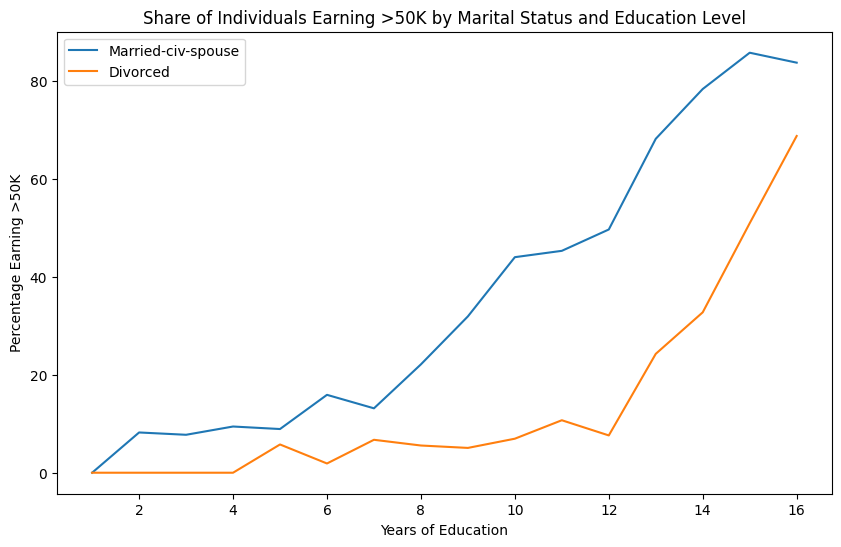

In [141]:
# Filter the data to include only 'Divorced' and 'Married-civ-spouse' groups
filtered_data = df_census_new.query("marital_status == 'Divorced' or marital_status == 'Married-civ-spouse'")

# Group the data by 'educ_num' and 'marital_status'
grouped_data = filtered_data.groupby(['educ_num', 'marital_status'])

# Calculate the percentage of individuals earning more than $50K in each group
total_count = grouped_data['wage'].count()
high_income_count = grouped_data.apply(lambda x: (x['wage'] == '>50K').sum())
percentage_high_income = (high_income_count / total_count) * 100

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))
for status in filtered_data['marital_status'].unique():
    data_subset = percentage_high_income.xs(status, level='marital_status')
    ax.plot(data_subset.index, data_subset.values, label=status)

ax.set_xlabel('Years of Education')
ax.set_ylabel('Percentage Earning >50K')
ax.set_title('Share of Individuals Earning >50K by Marital Status and Education Level')
ax.legend()
plt.show()

# Part 4: Reshaping  Dataframes

Often we have data that comes in a format that does not fit our purpose.

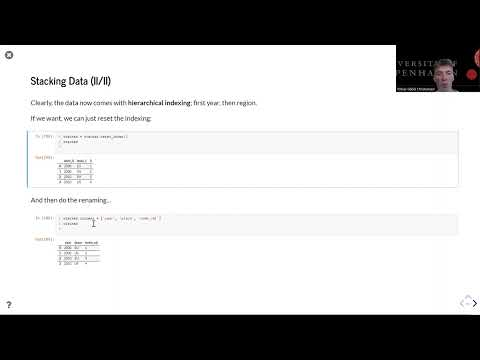

In [ ]:
YouTubeVideo('cJOo01dj5hs', width=640, height=360)

In this exercise, we continue working with the NOAA data that you worked with in the main section of part 3.

> **Ex. 3.4.1:** For which months was the temperature in general (i.e. use the mean) lower in 1870 vs. 1875?
>
> *Hint:* you may use `unstack`.

In [142]:
# Gruppere ud fra 'year' og 'month' og regner mean ud fra alle stationer
df_mean_temp = df_combined3.groupby(['year', 'month'])['tmax_mean'].mean()

# Unstack the year level of the resulting series
df_temp_comparison = df_mean_temp.unstack(level='year')

# Find the months where the mean temperature was lower in 1870 than in 1875
lower_temp_months = df_temp_comparison[df_temp_comparison[1870] < df_temp_comparison[1875]].index

# Print the result
print(f"Months with lower mean temperature in 1870 than in 1875: {lower_temp_months}")

df_temp_comparison


Months with lower mean temperature in 1870 than in 1875: Index([8], dtype='int32', name='month')


year,1870,1871,1872,1873,1874,1875
month,,,,,,
1,6.014052,3.726329,5.544101,3.321473,4.956034,1.293495
2,4.846081,6.551479,6.803171,3.785288,4.160201,1.288969
3,7.222374,10.927658,7.183613,8.132554,7.760918,6.038943
4,15.242456,14.231455,14.090786,12.321324,11.321423,12.019051
5,19.399303,17.901134,18.449194,17.911066,18.111189,18.190287
6,22.737856,20.238003,22.763902,23.378227,22.091183,22.334913
7,24.162403,23.151374,25.056778,25.012007,24.743362,23.818522
8,22.710448,23.519154,24.201502,24.021592,23.215637,23.917972
9,19.946442,19.561946,21.225197,20.339495,21.499242,19.884788
